## Import libraries

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np

## Load data

In [2]:
df_demo = pd.read_csv('Data/df_demography.csv', sep=',', dtype={'cpr': str})
df_pers = pd.read_csv('Data/df_personal_characteristic.csv', sep=',', dtype={'cpr': str})

In [3]:
df_pers.to_pickle('Data/df_personal_characteristic.pkl')

In [4]:
df_pers = pd.read_pickle('Data/df_personal_characteristic.pkl')

## Data preprocessing / Feature engineering

#### Merge datakilder

In [5]:
df_demo.head(5)

,cpr,municipality,salary
0,1203913055,Esbjerg,377218
1,1308952064,Sønderborg,286903
2,2410936634,Thisted,337835
3,1605952976,København,273928
4,2802942759,Silkeborg,318220


In [6]:
df_pers.head(5)

,cpr,height,weight,hair_len
0,1203913055,1.80,82.1,7.5
1,1308952064,1.58,61.6,47.2
2,2410936634,1.66,73.7,28.4
3,1605952976,1.71,74.2,46.8
4,2802942759,1.91,83.8,6.3


In [7]:
df = pd.merge(df_demo, df_pers, on='cpr')

In [8]:
df.head(5)

,cpr,municipality,salary,height,weight,hair_len
0,1203913055,Esbjerg,377218,1.80,82.1,7.5
1,1308952064,Sønderborg,286903,1.58,61.6,47.2
2,2410936634,Thisted,337835,1.66,73.7,28.4
3,1605952976,København,273928,1.71,74.2,46.8
4,2802942759,Silkeborg,318220,1.91,83.8,6.3


#### Generer nye variable

In [9]:
df['gender'] = df['cpr'].str[9].apply(int)
df['gender'] = np.where(df['gender'] % 2 == 0, 'woman', 'man')

In [10]:
df.head(5)

,cpr,municipality,salary,height,weight,hair_len,gender
0,1203913055,Esbjerg,377218,1.80,82.1,7.5,man
1,1308952064,Sønderborg,286903,1.58,61.6,47.2,woman
2,2410936634,Thisted,337835,1.66,73.7,28.4,woman
3,1605952976,København,273928,1.71,74.2,46.8,woman
4,2802942759,Silkeborg,318220,1.91,83.8,6.3,man


In [11]:
df['year'] = df['cpr'].str[4:6]
df['year'] = '19' + df['year']

In [12]:
df['month'] = df['cpr'].str[2:4]

In [13]:
df['day'] = df['cpr'].str[0:2]

In [14]:
df['birthday'] = pd.to_datetime(df['day'] + df['month'] + df['year'], format='%d%m%Y')

In [15]:
df.head(5)

,cpr,municipality,salary,height,weight,hair_len,gender,year,month,day,birthday
0,1203913055,Esbjerg,377218,1.80,82.1,7.5,man,1991,03,12,1991-03-12
1,1308952064,Sønderborg,286903,1.58,61.6,47.2,woman,1995,08,13,1995-08-13
2,2410936634,Thisted,337835,1.66,73.7,28.4,woman,1993,10,24,1993-10-24
3,1605952976,København,273928,1.71,74.2,46.8,woman,1995,05,16,1995-05-16
4,2802942759,Silkeborg,318220,1.91,83.8,6.3,man,1994,02,28,1994-02-28


In [16]:
from datetime import datetime

df['age'] = datetime.now() - df['birthday']
df['age'] = df['age'].astype('timedelta64[Y]')

In [17]:
df.head(5)

,cpr,municipality,salary,height,weight,hair_len,gender,year,month,day,birthday,age
0,1203913055,Esbjerg,377218,1.80,82.1,7.5,man,1991,03,12,1991-03-12,28.0
1,1308952064,Sønderborg,286903,1.58,61.6,47.2,woman,1995,08,13,1995-08-13,23.0
2,2410936634,Thisted,337835,1.66,73.7,28.4,woman,1993,10,24,1993-10-24,25.0
3,1605952976,København,273928,1.71,74.2,46.8,woman,1995,05,16,1995-05-16,24.0
4,2802942759,Silkeborg,318220,1.91,83.8,6.3,man,1994,02,28,1994-02-28,25.0


## Split into train and test set

In [18]:
X = df[['weight', 'height']].values
y = df['gender'].values

In [19]:
X

array([[82.1 ,  1.8 ],
       [61.6 ,  1.58],
       [73.7 ,  1.66],
       ...,
       [78.7 ,  1.67],
       [84.5 ,  1.91],
       [66.  ,  1.82]])

In [20]:
y

array(['man', 'woman', 'woman', ..., 'woman', 'man', 'woman'],
      dtype=object)

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [22]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(7767, 2)
(6213, 2)
(1554, 2)


## Build and train model

In [23]:
from sklearn.neighbors import KNeighborsClassifier

In [24]:
model = KNeighborsClassifier(n_neighbors=2)

In [25]:
model.fit(X_train, y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [26]:
print(model.n_neighbors)
print(model.classes_)

2
['man' 'woman']


## Make predictions

In [27]:
prediction = model.predict([[1.1, 2.0]])
print(prediction)

['woman']


In [28]:
prediction_probability = model.predict_proba([[1.1, 2.0]])
print(prediction_probability)

[[0. 1.]]


In [29]:
y_pred = model.predict(X_test)

In [30]:
y_pred

array(['man', 'woman', 'woman', ..., 'woman', 'man', 'woman'],
      dtype=object)

## Performance metrics

In [31]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

In [32]:
print(y_test)
print(y_pred)

['man' 'woman' 'woman' ... 'woman' 'man' 'woman']
['man' 'woman' 'woman' ... 'woman' 'man' 'woman']


In [33]:
confusion_matrix(y_test, y_pred)

array([[730,  21],
       [ 70, 733]])

In [34]:
accuracy_score(y_test, y_pred)

# sum(y_test == y_pred) / len(y_test)

0.9414414414414415

In [35]:
precision_score(y_test, y_pred, pos_label='woman')

# tp / (tp + fp)

0.9721485411140584

In [36]:
recall_score(y_test, y_pred, pos_label='woman')

# tp / (tp + fn)

0.912826899128269

## Visualize

In [41]:
N = 1500
df_gender = df[df['gender'] == 'man']

heights = df_gender['height'].values
heights = np.random.choice(heights, size=N)

weights = df_gender['weight'].values
weights = np.random.choice(weights, size=N)

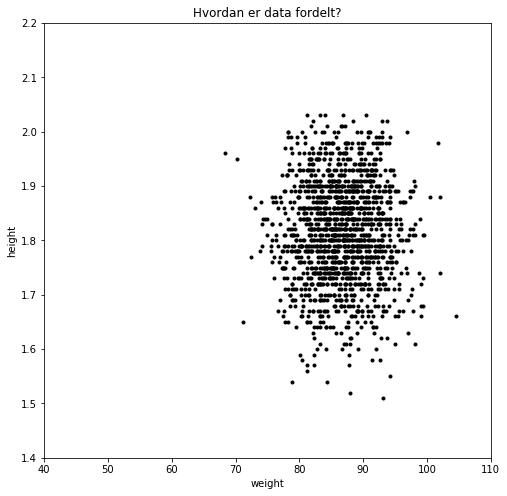

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))
plt.plot(weights, heights, 'k.')
plt.axis([40, 110, 1.4, 2.2])
plt.xlabel('weight')
plt.ylabel('height')
plt.title('Hvordan er data fordelt?')
plt.show()

In [44]:
color_true = np.where(y_test == 'woman', 'b', 'r')
color_pred = np.where(y_pred == 'woman', 'c', 'm')

ValueError: 'c' argument has 1554 elements, which is not acceptable for use with 'x' with size 1500, 'y' with size 1500.

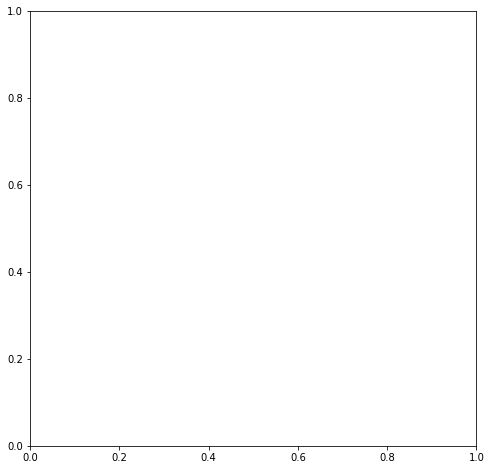

In [46]:
plt.figure(figsize=(8,8))
plt.scatter(weights, heights, c=color_true, marker='.')
plt.axis([40, 110, 1.4, 2.2])
plt.xlabel('weight')
plt.ylabel('height')
plt.title('Hvordan er data fordelt?')
plt.show()

## Fine tune model

## Øvelser